In [2]:
from scipy.stats import skew, kurtosis
from skimage import filters
from skimage.measure import shannon_entropy
import os 
import numpy as np
import matplotlib.pyplot as plt

In [29]:
image_folder = 'data/images/all'

image_list = os.listdir(image_folder)
length = len(image_list)
print(f"Number of images: {length}")
print(image_list)
# check that numbers are from 1 to 326 
l = [0] * 326
for img in image_list: 
    pointer = 1
    while img[pointer] != '_':
        pointer += 1
    num = int(img[1:pointer])
    l[num-1] = 1

for i in range(326):
    if l[i] == 0:
        print(f"Missing image {i+1}")

Number of images: 503
['P100_L_CM_MLO.jpg', 'P100_R_CM_MLO.jpg', 'P101_L_CM_MLO.jpg', 'P101_R_CM_MLO.jpg', 'P102_L_CM_MLO.jpg', 'P102_R_CM_MLO.jpg', 'P103_L_CM_MLO.jpg', 'P103_R_CM_MLO.jpg', 'P104_L_CM_MLO.jpg', 'P105_L_CM_MLO.jpg', 'P105_R_CM_MLO.jpg', 'P106_L_CM_MLO.jpg', 'P107_R_CM_MLO.jpg', 'P10_L_CM_MLO.jpg', 'P10_R_CM_MLO.jpg', 'P110_L_CM_MLO.jpg', 'P110_R_CM_MLO.jpg', 'P111_L_CM_MLO.jpg', 'P111_R_CM_MLO.jpg', 'P113_L_CM_MLO.jpg', 'P113_R_CM_MLO.jpg', 'P114_L_CM_MLO.jpg', 'P114_R_CM_MLO.jpg', 'P115_L_CM_MLO.jpg', 'P115_R_CM_MLO.jpg', 'P116_L_CM_MLO.jpg', 'P116_R_CM_MLO.jpg', 'P118_R_CM_MLO.jpg', 'P119_L_CM_MLO.jpg', 'P119_R_CM_MLO.jpg', 'P11_R_CM_MLO.jpg', 'P120_L_CM_MLO.jpg', 'P121_R_CM_MLO.jpg', 'P122_L_CM_MLO.jpg', 'P122_R_CM_MLO.jpg', 'P123_L_CM_MLO.jpg', 'P123_R_CM_MLO.jpg', 'P124_L_CM_MLO.jpg', 'P124_R_CM_MLO.jpg', 'P125_L_CM_MLO.jpg', 'P125_R_CM_MLO.jpg', 'P126_L_CM_MLO.jpg', 'P126_R_CM_MLO.jpg', 'P127_L_CM_MLO.jpg', 'P128_L_CM_MLO.jpg', 'P128_R_CM_MLO.jpg', 'P129_L_CM_MLO

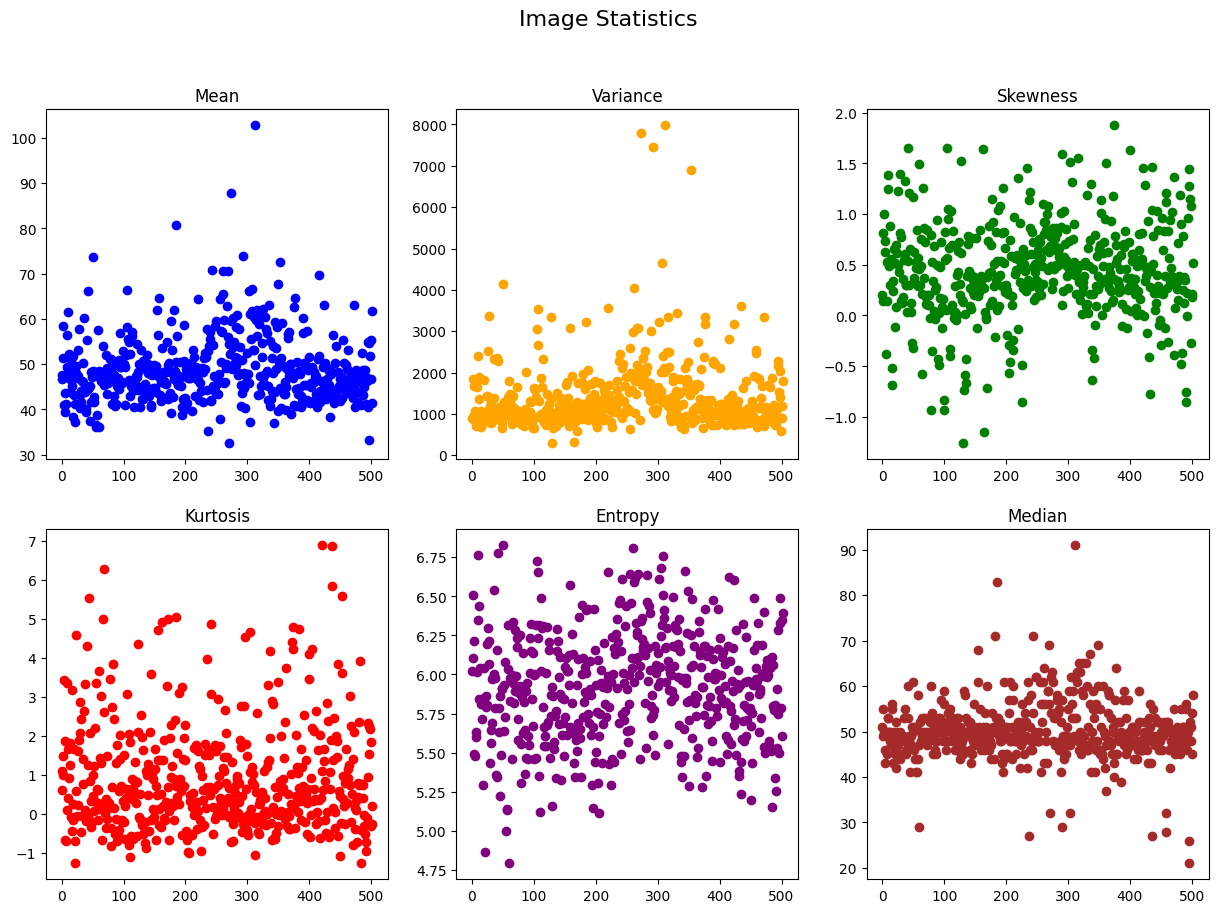

In [9]:
# plot all relevant statistics of all images

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Image Statistics', fontsize=16)
axs[0, 0].set_title('Mean')
axs[0, 1].set_title('Variance')
axs[0, 2].set_title('Skewness')
axs[1, 0].set_title('Kurtosis')
axs[1, 1].set_title('Entropy')
axs[1, 2].set_title('Median')

for i, image_name in enumerate(image_list):
    image_path = os.path.join(image_folder, image_name)
    image = plt.imread(image_path)

    # Convert to grayscale if the image is RGB
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)

    # Calculate statistics
    mean = np.mean(image)
    variance = np.var(image)
    skewness = skew(image.flatten())
    kurt = kurtosis(image.flatten())
    entropy = shannon_entropy(image)
    median = np.median(image)

    # Plot statistics
    axs[0, 0].scatter(i, mean, color='blue')
    axs[0, 1].scatter(i, variance, color='orange')
    axs[0, 2].scatter(i, skewness, color='green')
    axs[1, 0].scatter(i, kurt, color='red')
    axs[1, 1].scatter(i, entropy, color='purple')
    axs[1, 2].scatter(i, median, color='brown')

Original image size: (1523, 2459)


'\n# transform image\nimage_tensor = transform(image)\n\n# print image size after transformation\nimage_tensor = image_tensor.permute(1, 2, 0)  # Change the order of dimensions for visualization\nplt.imshow(image_tensor.numpy())\n\n\ndef denormalize(tensor):\n    # Reverse normalization\n    mean = torch.tensor([0.485, 0.456, 0.406])\n    std = torch.tensor([0.229, 0.224, 0.225])\n    tensor = tensor * std + mean  # Reverse normalization\n    tensor = torch.clamp(tensor, 0, 1)  # Clamp to valid pixel range\n    return tensor\n\n# After transformation\ndenormalized_image = denormalize(image_tensor)\nplt.imshow(denormalized_image.numpy())\n'

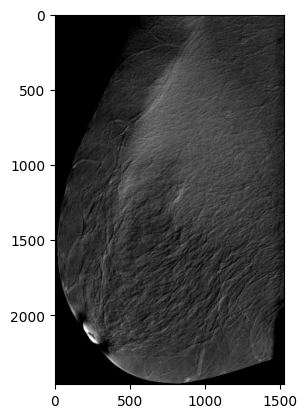

In [28]:
from torchvision import transforms
from PIL import Image
import torch

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image1 = image_list[1]

# load before and after transformation for image1
image_path = os.path.join(image_folder, image1)

image = Image.open(image_path).convert("RGB")
# print image size
print(f"Original image size: {image.size}")
plt.imshow(image)

"""
# transform image
image_tensor = transform(image)

# print image size after transformation
image_tensor = image_tensor.permute(1, 2, 0)  # Change the order of dimensions for visualization
plt.imshow(image_tensor.numpy())


def denormalize(tensor):
    # Reverse normalization
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    tensor = tensor * std + mean  # Reverse normalization
    tensor = torch.clamp(tensor, 0, 1)  # Clamp to valid pixel range
    return tensor

# After transformation
denormalized_image = denormalize(image_tensor)
plt.imshow(denormalized_image.numpy())
"""